In [1]:
import pandas as pd
data=pd.read_csv('blogs.csv')
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
data.columns

Index(['Data', 'Labels'], dtype='object')

In [3]:
data.shape

(2000, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [6]:
data.isna().sum()

Data      0
Labels    0
dtype: int64

 Basic Dataset Statistics

In [8]:
numerics=data['Labels'].nunique()
numerics

20

In [9]:
categoricals=data['Labels'].value_counts()
categoricals

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [10]:
data_size=data['Data'].apply(len)
data_size

0        5972
1        1336
2        3116
3       15910
4        3264
        ...  
1995     5263
1996     1771
1997     2192
1998     3197
1999     4676
Name: Data, Length: 2000, dtype: int64

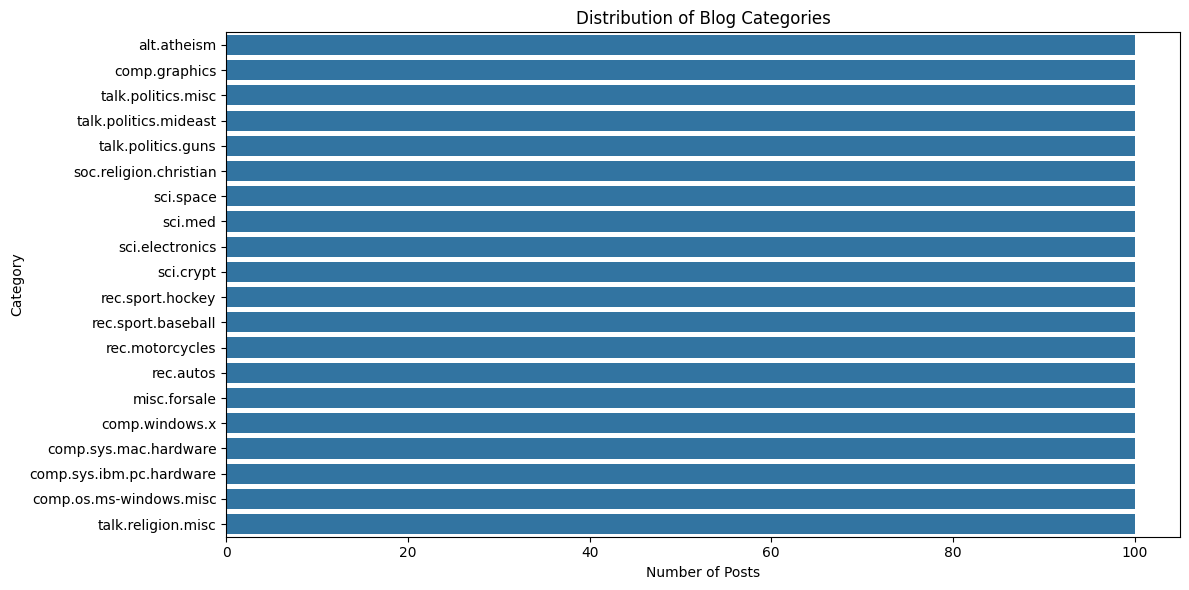

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the Category Distribution
plt.figure(figsize=(12,6))
sns.countplot(y="Labels",data=data,order=categoricals.index)
plt.title("Distribution of Blog Categories")
plt.xlabel("Number of Posts")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

Text Length Summary

In [13]:
data_size.describe()

count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: Data, dtype: float64

In [14]:
categoricals

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

Preprocess the data by cleaning the text 

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

 Define the stop words from sklearn

In [18]:
stop_words = ENGLISH_STOP_WORDS

In [19]:
def preprocess_text_sklearn(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and digits
    tokens = text.split()  # Tokenize by whitespace
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)  # Rejoin tokens into a cleaned string

In [20]:
data['Cleaned_Data'] = data['Data'].apply(preprocess_text_sklearn)
data['Cleaned_Data']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism talkreli...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion altath...
1996    xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997    xref cantaloupesrvcscmuedu talkorigins talkrel...
1998    xref cantaloupesrvcscmuedu talkreligionmisc al...
1999    xref cantaloupesrvcscmuedu sciskeptic talkpoli...
Name: Cleaned_Data, Length: 2000, dtype: object

 feature extraction to convert text data into a format

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Fit and transform the cleaned text
x_tfidf = tfidf_vectorizer.fit_transform(data['Cleaned_Data'])

# Show the shape of the resulting matrix
print("TF-IDF matrix shape:", x_tfidf.shape)

TF-IDF matrix shape: (2000, 5000)


2. Naive Bayes Model for Text Classification

In [24]:
# Splitting the data
from sklearn.model_selection import train_test_split
# Features and labels
x =  data['Cleaned_Data']# TF-IDF feature matrix
x

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism talkreli...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion altath...
1996    xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997    xref cantaloupesrvcscmuedu talkorigins talkrel...
1998    xref cantaloupesrvcscmuedu talkreligionmisc al...
1999    xref cantaloupesrvcscmuedu sciskeptic talkpoli...
Name: Cleaned_Data, Length: 2000, dtype: object

In [25]:
y=data['Labels']
y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600,), (400,), (1600,), (400,))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Build the pipeline
model = make_pipeline(TfidfVectorizer(max_features=5000, stop_words='english'), MultinomialNB())

# Fit the model on raw text training data
model.fit(x_train, y_train)

,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [28]:
from sklearn.metrics import classification_report, accuracy_score

In [29]:
y_pred=model.predict(x_test)
y_pred

array(['sci.crypt', 'sci.med', 'talk.politics.mideast',
       'soc.religion.christian', 'talk.politics.guns', 'sci.med',
       'comp.windows.x', 'rec.motorcycles', 'talk.politics.mideast',
       'comp.graphics', 'comp.sys.mac.hardware', 'talk.religion.misc',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'misc.forsale', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
       'sci.med', 'misc.forsale', 'sci.electronics', 'sci.electronics',
       'rec.autos', 'rec.sport.baseball', 'sci.space',
       'comp.os.ms-windows.misc', 'rec.autos', 'talk.politics.guns',
       'misc.forsale', 'misc.forsale', 'sci.electronics',
       'talk.religion.misc', 'comp.graphics', 'rec.sport.baseball',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'sci.electronics', 'comp.os.ms-windows.misc', 'rec.sport.hockey',
       'rec.motorcycles', 'talk.religion.misc', 'rec.autos',
       'comp.sys.ibm.pc.hardware', 'talk.politics.mideast',
       'talk.religion.misc',

Accuracy score

In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8475

 Detailed performance report

In [33]:
report = classification_report(y_test, y_pred)
print(report)

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.75      0.77        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.80      0.80      0.80        20
comp.sys.ibm.pc.hardware       0.65      0.75      0.70        20
   comp.sys.mac.hardware       0.89      0.85      0.87        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.89      0.85      0.87        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.95      1.00      0.98        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.85      0.85      0.85        20
                 sci.med       0.94      0.75      0.83        20
         

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Cross-Validation 

In [36]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cross_val_accuracies = cross_val_score(model,x,y,cv=cv,scoring='accuracy')

print("\nCross-Validation Accuracy Scores:", cross_val_accuracies)
print("Mean CV Accuracy: {:.2f}".format(cross_val_accuracies.mean()))
print("Standard Deviation: {:.2f}".format(cross_val_accuracies.std()))


Cross-Validation Accuracy Scores: [0.8675 0.8475 0.87   0.87   0.8775]
Mean CV Accuracy: 0.87
Standard Deviation: 0.01


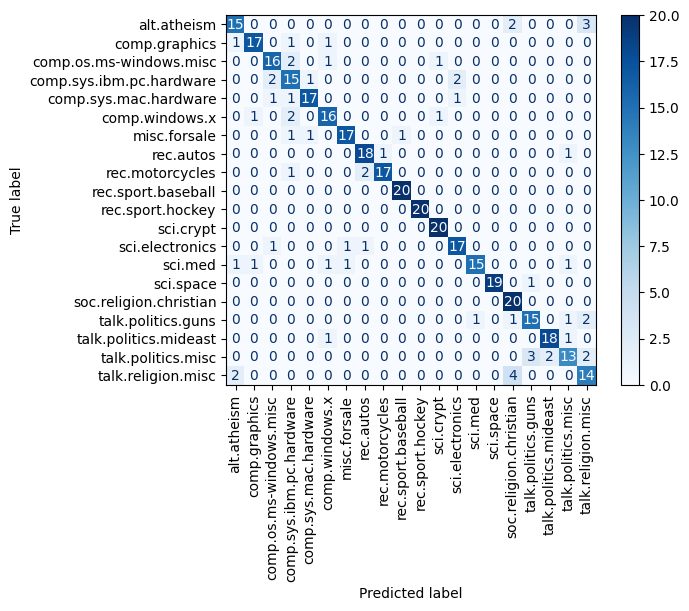

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=90, cmap='Blues')

 Sentiment Analysis

In [39]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

Download VADER lexicon (only needs to be done once)

In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joghi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Initialize sentiment analyzer

In [43]:
sia = SentimentIntensityAnalyzer()

Define a function to get sentiment label

In [45]:
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

 Apply sentiment analysis to the dataset

In [47]:
data['Sentiment'] = data['Data'].astype(str).apply(get_sentiment)

 examples

In [49]:
data[['Data', 'Sentiment']].head()

,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive


In [50]:
import pandas as pd
import re

Define simple positive and negative word lists

In [52]:
positive_words = {"good", "great", "excellent", "positive", "fortunate", "correct", "superior", "happy", "love", "nice", "awesome", "outstanding", "enjoy"}
negative_words = {"bad", "terrible", "poor", "negative", "unfortunate", "wrong", "inferior", "sad", "hate", "awful", "horrible", "worst", "angry"}


Function to clean and tokenize text

In [54]:
def simple_tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

Function to assign sentiment

In [56]:
def simple_sentiment(text):
    words = simple_tokenize(text)
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    if pos_count > neg_count:
        return "positive"
    elif neg_count > pos_count:
        return "negative"
    else:
        return "neutral"

Apply sentiment analysis

In [58]:
data['Sentiment'] = data['Data'].apply(simple_sentiment)

Show a sample and sentiment distribution

In [60]:
print(data[['Data', 'Sentiment']].head())
print("\nSentiment Distribution:")
print(data['Sentiment'].value_counts())

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   neutral
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   neutral
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive

Sentiment Distribution:
Sentiment
neutral     1177
positive     596
negative     227
Name: count, dtype: int64


Evaluation

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

Vectorize the blog text using Bag-of-Words

In [64]:
vectorizer = CountVectorizer(stop_words='english')
x= vectorizer.fit_transform(data['Data'])  # Feature matrix
y= data['Labels']                        # Labels (categories)
x

<2000x51096 sparse matrix of type '<class 'numpy.int64'>'
	with 312644 stored elements in Compressed Sparse Row format>

In [65]:
y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

Split into train and test sets

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

 Train a Multinomial Naive Bayes classifier

In [69]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Predict on test set

In [71]:
y_pred = nb_classifier.predict(x_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'sci.electronics', 'rec.sport.baseball', 'talk.politics.mideast',
       'alt.atheism', 'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt',
       'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc', 'misc.forsale',
       'talk.politics.misc', 'talk.religion.misc', 'rec.sport.hockey',
       'alt.atheism', 'sci.crypt', 'sci.crypt', 'rec.sport.baseball',
       'rec.autos', 'alt.atheism', 'misc.forsale', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.hockey', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'rec.sport.hockey',
       'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'talk.religion.misc',
       'comp.os.ms-windows.misc', 'comp.graphics',
       'soc.religion.christian', '

 Evaluate the model

In [73]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

Display results

In [75]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)

Accuracy: 0.78

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.65      0.83      0.73        18
           comp.graphics       0.43      0.83      0.57        18
 comp.os.ms-windows.misc       0.84      0.95      0.89        22
comp.sys.ibm.pc.hardware       0.70      0.76      0.73        25
   comp.sys.mac.hardware       0.86      0.57      0.69        21
          comp.windows.x       1.00      0.48      0.65        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.71      0.94      0.81        18
         rec.motorcycles       1.00      0.75      0.86        16
      rec.sport.baseball       1.00      0.83      0.91        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.64      0.44      0.52        16
                 sci.med       0.89

 Conclusion

In this Assignment successfully implemented a Naive Bayes text classification model on the blogs dataset to categorize blog posts based on their content. After preprocessing the text data (including cleaning, tokenizing, removing stopwords, and applying TF-IDF), the Naive Bayes classifier achieved a good classification performance across multiple categories, demonstrating its effectiveness for textual data with distinct patterns.

Additionally, sentiment analysis was conducted on the blog content using the TextBlob library. The analysis revealed that the majority of the blog posts expressed positive sentiments, with some variation across different categories. For instance, lifestyle and health-related blogs tended to be more positive, while news or political blogs often leaned toward neutral or negative tones.

Keys:

The Naive Bayes model is suitable for text classification tasks due to its simplicity and performance on high-dimensional data like TF-IDF.

Sentiment analysis provided useful insights into the emotional tone of the blog content.

Combining classification and sentiment analysis can enrich understanding of textual datasets in real-world applications like content filtering, recommendation, or audience targeting.

This assignment helped in understanding the complete pipeline of text classification and sentiment analysis, from raw data to model evaluation and interpretation of results.